In [1]:
import cv2
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import urllib
import wget

In [2]:
flowers = glob.glob('./data/flr_*.jpg')
fungus = glob.glob('./data/fgs_*.jpg')
rocks = glob.glob('./data/rck_*.jpg')

pixel_flowers = glob.glob('./data/pxl_flower_*.jpeg')
pixel_umbrella = glob.glob('./data/pxl_umbrella_*.jpeg')

flowers102 = glob.glob('./data/jpg/image_*.jpg')

open_image_mushroom = glob.glob('./data/Open_Image/Mushroom/*.jpg')
open_image_umbrella = glob.glob('./data/Open_Image/Umbrella/*.jpg')
print("There are %s+%s+%s flower, %s+%s fungus, %s rock and %s+%s umbrella pictures" 
      %(len(flowers), len(pixel_flowers), len(flowers102), 
        len(fungus), len(open_image_mushroom), len(rocks), 
        len(pixel_umbrella), len(open_image_umbrella)))

There are 1269+1792+8189 flower, 856+1782 fungus, 1007 rock and 420+3357 umbrella pictures


# Resizing and reshaping

In [3]:
filepath = rocks[330]

img = mpimg.imread(filepath)

In [4]:
filepath

'./data\\rck_00430.jpg'

In [5]:
img.shape

(500, 375, 3)

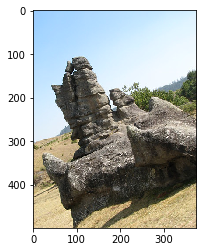

In [6]:
imgplot = plt.imshow(img)
plt.show()

In [8]:
width = 224
height = 224

dim = (width, height)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 

In [9]:
resized.shape

(224, 224, 3)

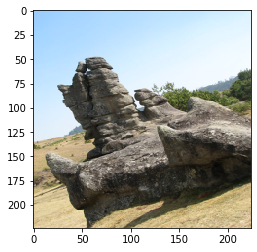

In [10]:
imgplot = plt.imshow(resized)
plt.show()

In [11]:
def resized(width, height, img):
    dim = (width, height)
    img_resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return img_resized[:,:,0:3] # And only take the RGB
    

In [47]:
# flowers = glob.glob('./data/flr_*.jpg')
# pixel_flowers = glob.glob('./data/pxl_flower_*.jpeg')
# flowers102 = glob.glob('./data/jpg/image_*.jpg')

# fungus = glob.glob('./data/fgs_*.jpg')
# rocks = glob.glob('./data/rck_*.jpg')
# pixel_umbrella = glob.glob('./data/pxl_umbrella_*.jpeg')
# open_image_mushroom = glob.glob('./data/Open_Image/Mushroom/*.jpg')
# open_image_umbrella = glob.glob('./data/Open_Image/Umbrella/*.jpg')

# flrDat = np.load('flr-imgs.npz')['arr_0']
# pxlflrDat = np.load('pxl_flr-imgs.npz')['arr_0']
# flr102Dat = np.load('flr102-imgs.npz')['arr_0']

# fgsDat = np.load('fgs-imgs.npz')['arr_0']
# rckDat = np.load('rck-imgs.npz')['arr_0']
# pxlumbDat = np.load('pxl_umb-imgs.npz')['arr_0']
# OpnImgfgsDat = np.load('fgsOpnImg-imgs.npz')['arr_0']
# OpnImgumbDat = np.load('umbOpnImg-imgs.npz')['arr_0']

pixels = 224

process_file = flowers
save_filename = "flr-imgs" + str(pixels) + ".npz"

resized_array = []
for i in range(len(process_file)):
    item_filepath = process_file[i]

    img = mpimg.imread(item_filepath)
    if len(img.shape) == 3 and img.shape[2] == 3:
        resized_img = resized(pixels, pixels, img) 
        print(i, item_filepath, resized_img.shape)
        resized_array.append(resized_img)
    
output = np.array(resized_array)

0 ./data\flr_00001.jpg (224, 224, 3)
1 ./data\flr_00005.jpg (224, 224, 3)
2 ./data\flr_00008.jpg (224, 224, 3)
3 ./data\flr_00009.jpg (224, 224, 3)
4 ./data\flr_00011.jpg (224, 224, 3)
5 ./data\flr_00012.jpg (224, 224, 3)
6 ./data\flr_00013.jpg (224, 224, 3)
7 ./data\flr_00014.jpg (224, 224, 3)
8 ./data\flr_00015.jpg (224, 224, 3)
9 ./data\flr_00017.jpg (224, 224, 3)
10 ./data\flr_00018.jpg (224, 224, 3)
11 ./data\flr_00020.jpg (224, 224, 3)
12 ./data\flr_00021.jpg (224, 224, 3)
13 ./data\flr_00022.jpg (224, 224, 3)
14 ./data\flr_00024.jpg (224, 224, 3)
15 ./data\flr_00025.jpg (224, 224, 3)
16 ./data\flr_00027.jpg (224, 224, 3)
17 ./data\flr_00028.jpg (224, 224, 3)
18 ./data\flr_00034.jpg (224, 224, 3)
19 ./data\flr_00035.jpg (224, 224, 3)
20 ./data\flr_00040.jpg (224, 224, 3)
21 ./data\flr_00044.jpg (224, 224, 3)
22 ./data\flr_00045.jpg (224, 224, 3)
23 ./data\flr_00046.jpg (224, 224, 3)
24 ./data\flr_00047.jpg (224, 224, 3)
25 ./data\flr_00048.jpg (224, 224, 3)
26 ./data\flr_00051.jp

226 ./data\flr_00414.jpg (224, 224, 3)
227 ./data\flr_00415.jpg (224, 224, 3)
228 ./data\flr_00417.jpg (224, 224, 3)
229 ./data\flr_00418.jpg (224, 224, 3)
230 ./data\flr_00420.jpg (224, 224, 3)
231 ./data\flr_00421.jpg (224, 224, 3)
232 ./data\flr_00426.jpg (224, 224, 3)
233 ./data\flr_00429.jpg (224, 224, 3)
234 ./data\flr_00430.jpg (224, 224, 3)
235 ./data\flr_00431.jpg (224, 224, 3)
236 ./data\flr_00433.jpg (224, 224, 3)
237 ./data\flr_00436.jpg (224, 224, 3)
238 ./data\flr_00437.jpg (224, 224, 3)
239 ./data\flr_00438.jpg (224, 224, 3)
240 ./data\flr_00440.jpg (224, 224, 3)
241 ./data\flr_00443.jpg (224, 224, 3)
242 ./data\flr_00445.jpg (224, 224, 3)
243 ./data\flr_00448.jpg (224, 224, 3)
244 ./data\flr_00449.jpg (224, 224, 3)
245 ./data\flr_00450.jpg (224, 224, 3)
246 ./data\flr_00453.jpg (224, 224, 3)
247 ./data\flr_00455.jpg (224, 224, 3)
248 ./data\flr_00457.jpg (224, 224, 3)
249 ./data\flr_00460.jpg (224, 224, 3)
250 ./data\flr_00463.jpg (224, 224, 3)
251 ./data\flr_00466.jpg 

447 ./data\flr_00818.jpg (224, 224, 3)
448 ./data\flr_00819.jpg (224, 224, 3)
449 ./data\flr_00821.jpg (224, 224, 3)
450 ./data\flr_00824.jpg (224, 224, 3)
451 ./data\flr_00827.jpg (224, 224, 3)
452 ./data\flr_00828.jpg (224, 224, 3)
453 ./data\flr_00830.jpg (224, 224, 3)
454 ./data\flr_00832.jpg (224, 224, 3)
455 ./data\flr_00835.jpg (224, 224, 3)
456 ./data\flr_00836.jpg (224, 224, 3)
457 ./data\flr_00839.jpg (224, 224, 3)
458 ./data\flr_00841.jpg (224, 224, 3)
459 ./data\flr_00842.jpg (224, 224, 3)
460 ./data\flr_00847.jpg (224, 224, 3)
461 ./data\flr_00850.jpg (224, 224, 3)
462 ./data\flr_00852.jpg (224, 224, 3)
463 ./data\flr_00855.jpg (224, 224, 3)
464 ./data\flr_00856.jpg (224, 224, 3)
465 ./data\flr_00861.jpg (224, 224, 3)
466 ./data\flr_00862.jpg (224, 224, 3)
467 ./data\flr_00863.jpg (224, 224, 3)
468 ./data\flr_00864.jpg (224, 224, 3)
469 ./data\flr_00866.jpg (224, 224, 3)
470 ./data\flr_00867.jpg (224, 224, 3)
471 ./data\flr_00871.jpg (224, 224, 3)
472 ./data\flr_00873.jpg 

660 ./data\flr_01185.jpg (224, 224, 3)
661 ./data\flr_01186.jpg (224, 224, 3)
662 ./data\flr_01187.jpg (224, 224, 3)
663 ./data\flr_01188.jpg (224, 224, 3)
664 ./data\flr_01189.jpg (224, 224, 3)
665 ./data\flr_01192.jpg (224, 224, 3)
666 ./data\flr_01195.jpg (224, 224, 3)
667 ./data\flr_01196.jpg (224, 224, 3)
668 ./data\flr_01200.jpg (224, 224, 3)
669 ./data\flr_01201.jpg (224, 224, 3)
670 ./data\flr_01203.jpg (224, 224, 3)
671 ./data\flr_01206.jpg (224, 224, 3)
672 ./data\flr_01209.jpg (224, 224, 3)
673 ./data\flr_01210.jpg (224, 224, 3)
674 ./data\flr_01211.jpg (224, 224, 3)
675 ./data\flr_01212.jpg (224, 224, 3)
676 ./data\flr_01215.jpg (224, 224, 3)
677 ./data\flr_01216.jpg (224, 224, 3)
678 ./data\flr_01217.jpg (224, 224, 3)
679 ./data\flr_01218.jpg (224, 224, 3)
680 ./data\flr_01219.jpg (224, 224, 3)
681 ./data\flr_01227.jpg (224, 224, 3)
682 ./data\flr_01228.jpg (224, 224, 3)
683 ./data\flr_01229.jpg (224, 224, 3)
684 ./data\flr_01230.jpg (224, 224, 3)
685 ./data\flr_01233.jpg 

874 ./data\flr_01483.jpg (224, 224, 3)
875 ./data\flr_01484.jpg (224, 224, 3)
876 ./data\flr_01485.jpg (224, 224, 3)
877 ./data\flr_01486.jpg (224, 224, 3)
878 ./data\flr_01487.jpg (224, 224, 3)
879 ./data\flr_01488.jpg (224, 224, 3)
880 ./data\flr_01489.jpg (224, 224, 3)
881 ./data\flr_01491.jpg (224, 224, 3)
882 ./data\flr_01492.jpg (224, 224, 3)
883 ./data\flr_01493.jpg (224, 224, 3)
884 ./data\flr_01494.jpg (224, 224, 3)
885 ./data\flr_01495.jpg (224, 224, 3)
886 ./data\flr_01496.jpg (224, 224, 3)
887 ./data\flr_01497.jpg (224, 224, 3)
888 ./data\flr_01500.jpg (224, 224, 3)
889 ./data\flr_01501.jpg (224, 224, 3)
890 ./data\flr_01502.jpg (224, 224, 3)
891 ./data\flr_01503.jpg (224, 224, 3)
892 ./data\flr_01505.jpg (224, 224, 3)
893 ./data\flr_01506.jpg (224, 224, 3)
894 ./data\flr_01507.jpg (224, 224, 3)
895 ./data\flr_01508.jpg (224, 224, 3)
896 ./data\flr_01509.jpg (224, 224, 3)
897 ./data\flr_01510.jpg (224, 224, 3)
898 ./data\flr_01511.jpg (224, 224, 3)
899 ./data\flr_01512.jpg 

1103 ./data\flr_01742.jpg (224, 224, 3)
1104 ./data\flr_01743.jpg (224, 224, 3)
1105 ./data\flr_01744.jpg (224, 224, 3)
1106 ./data\flr_01745.jpg (224, 224, 3)
1107 ./data\flr_01746.jpg (224, 224, 3)
1108 ./data\flr_01747.jpg (224, 224, 3)
1109 ./data\flr_01748.jpg (224, 224, 3)
1110 ./data\flr_01749.jpg (224, 224, 3)
1111 ./data\flr_01750.jpg (224, 224, 3)
1112 ./data\flr_01752.jpg (224, 224, 3)
1113 ./data\flr_01753.jpg (224, 224, 3)
1114 ./data\flr_01754.jpg (224, 224, 3)
1115 ./data\flr_01755.jpg (224, 224, 3)
1116 ./data\flr_01756.jpg (224, 224, 3)
1117 ./data\flr_01757.jpg (224, 224, 3)
1118 ./data\flr_01762.jpg (224, 224, 3)
1119 ./data\flr_01763.jpg (224, 224, 3)
1120 ./data\flr_01764.jpg (224, 224, 3)
1121 ./data\flr_01765.jpg (224, 224, 3)
1122 ./data\flr_01766.jpg (224, 224, 3)
1123 ./data\flr_01767.jpg (224, 224, 3)
1124 ./data\flr_01769.jpg (224, 224, 3)
1125 ./data\flr_01770.jpg (224, 224, 3)
1126 ./data\flr_01771.jpg (224, 224, 3)
1127 ./data\flr_01772.jpg (224, 224, 3)


In [48]:
output.shape

(1269, 224, 224, 3)

# Save to npz file 

In [49]:
np.savez(save_filename, output)

In [50]:
trDat = np.load(save_filename)['arr_0']

In [51]:
len(trDat)

1269